# Moody News - an analysis of the mood of the news from tweets from 5 media sources

### Observations:
<table>
<tr><th>Serial #</th><th>Observation</th></tr>
<tr><td>1</td><td>The compound mood of the news was generally negative.</td></tr>
<tr><td>2</td><td>BBC had the highest negative mood probably because it was world news.</td></tr>
<tr><td>3</td><td>Fox News, which is more right leaning had the least negative sentiment.</td></tr>
</table>

## First import the required libraries to read the tweets and initialize twitter API

In [32]:
# Dependencies
import tweepy
import json
import twitterconfig

# Twitter API Keys
consumer_key = twitterconfig.consumer_key
consumer_secret = twitterconfig.consumer_secret
access_token = twitterconfig.access_token
access_token_secret = twitterconfig.access_token_secret

# Setup Tweepy API Authentication

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Pick the media sources from which you want to read the tweets

In [33]:
#Create a list of News Twitter Handles
news_handles = ['@BBCWorld', '@CBSNews', '@CNN', '@FoxNews', '@NYTimes']

## Import the Vader Analysis library for analyzing the mood

In [34]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## Create a list to store the tweet and polarity information

In [35]:
news_tweets_sentiments = []

## Create function to hold tweet and polarity information for each row

In [36]:
def createSentimentDict(handle,tweet_text,tweets_ago):
    senti_dict = {}
    senti_dict["News Handle"] = handle
    senti_dict["Tweet Text"] = tweet_text
    senti_dict["Tweets Ago"] = tweets_ago
    senti_dict["Compound Sentiment"] = analyzer.polarity_scores(tweet_text)["compound"]
    senti_dict["Positive Sentiment"] = analyzer.polarity_scores(tweet_text)["pos"]
    senti_dict["Negative Sentiment"] = analyzer.polarity_scores(tweet_text)["neg"]
    senti_dict["Neutral Sentiment"] = analyzer.polarity_scores(tweet_text)["neu"]
    return senti_dict

## Fetch 100 tweets from each handle and analyze each tweet

In [37]:
for handle in news_handles:
    print()
    print("Analyzing tweets from "+handle)
    count = 0
    status_list = api.user_timeline(handle,count=100)
    for tweet in status_list:
        cur_senti_dict = createSentimentDict(handle,tweet["text"],count)
        news_tweets_sentiments.append(cur_senti_dict)
        count = count + 1


Analyzing tweets from @BBCWorld

Analyzing tweets from @CBSNews

Analyzing tweets from @CNN

Analyzing tweets from @FoxNews

Analyzing tweets from @NYTimes


## Import libraries for pandas and plotting to store and plot the data

In [38]:
#import Pandas and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Arrange the column order and create a dataframe

In [39]:
column_names= ["News Handle","Tweet Text","Tweets Ago","Compound Sentiment","Positive Sentiment","Negative Sentiment","Neutral Sentiment"]
sentiments_df = pd.DataFrame(news_tweets_sentiments,columns=column_names)
sentiments_df.head()

,News Handle,Tweet Text,Tweets Ago,Compound Sentiment,Positive Sentiment,Negative Sentiment,Neutral Sentiment
0,@BBCWorld,Kemerovo fire: Who are the victims in the Russ...,0,-0.5719,0.000,0.299,0.701
1,@BBCWorld,RT @BBC_HaveYourSay: Chicago superior? The phe...,1,0.5423,0.241,0.000,0.759
2,@BBCWorld,Kemerovo fire damage seen from inside gutted m...,2,-0.6808,0.000,0.444,0.556
3,@BBCWorld,"Twenty million Indians apply for 100,000 railw...",3,0.0000,0.000,0.000,1.000
4,@BBCWorld,When is a diplomat really just a spy? https://...,4,0.0000,0.000,0.000,1.000


## Get the date and store it as a string

In [40]:
import datetime
today = datetime.date.today().strftime("%Y/%m/%d")
today

'2018/03/27'

## Add the date as a column to the data

In [41]:
sentiments_df["Date"] = today

## Store the data in a csv file

In [42]:
sentiments_df.to_csv("news_sentiments.csv",index=False)

## Start plotting the data

In [43]:
plt.title("Sentiment Analysis of media tweets " +today)
plt.xlabel("Tweets ago")
plt.ylabel("Tweet Polarity")

Text(0,0.5,'Tweet Polarity')

## BBC

In [44]:
bbc_sentiments_df = sentiments_df[sentiments_df["News Handle"] == "@BBCWorld"]
bbc_sentiments_df["Color"] = 'skyblue'
bbc_sentiments_df["Size"] = 200
plt.scatter(bbc_sentiments_df["Tweets Ago"],bbc_sentiments_df["Compound Sentiment"],c=bbc_sentiments_df["Color"],
                      s=bbc_sentiments_df["Size"],edgecolor='black',alpha=0.75)

C:\Users\ravi_\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ravi_\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## CBS

In [45]:
cbs_sentiments_df = sentiments_df[sentiments_df["News Handle"] == "@CBSNews"]
cbs_sentiments_df["Color"] = 'green'
cbs_sentiments_df["Size"] = 200
plt.scatter(cbs_sentiments_df["Tweets Ago"],cbs_sentiments_df["Compound Sentiment"],c=cbs_sentiments_df["Color"],
                      s=cbs_sentiments_df["Size"],edgecolor='black',alpha=0.75)

C:\Users\ravi_\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ravi_\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## CNN

In [46]:
cnn_sentiments_df = sentiments_df[sentiments_df["News Handle"] == "@CNN"]
cnn_sentiments_df["Color"] = 'red'
cnn_sentiments_df["Size"] = 200
plt.scatter(cnn_sentiments_df["Tweets Ago"],cnn_sentiments_df["Compound Sentiment"],c=cnn_sentiments_df["Color"],
                      s=cnn_sentiments_df["Size"],edgecolor='black',alpha=0.75)

C:\Users\ravi_\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ravi_\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Fox News

In [47]:
fox_sentiments_df = sentiments_df[sentiments_df["News Handle"] == "@FoxNews"]
fox_sentiments_df["Color"] = 'blue'
fox_sentiments_df["Size"] = 200
plt.scatter(fox_sentiments_df["Tweets Ago"],fox_sentiments_df["Compound Sentiment"],c=fox_sentiments_df["Color"],
                      s=fox_sentiments_df["Size"],edgecolor='black',alpha=0.75)

C:\Users\ravi_\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ravi_\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## NY Times

In [48]:
nyt_sentiments_df = sentiments_df[sentiments_df["News Handle"] == "@NYTimes"]
nyt_sentiments_df["Color"] = 'yellow'
nyt_sentiments_df["Size"] = 200
plt.scatter(nyt_sentiments_df["Tweets Ago"],nyt_sentiments_df["Compound Sentiment"],c=nyt_sentiments_df["Color"],
                      s=nyt_sentiments_df["Size"],edgecolor='black',alpha=0.75)

C:\Users\ravi_\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ravi_\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Plot and show the scatter plot and save the image

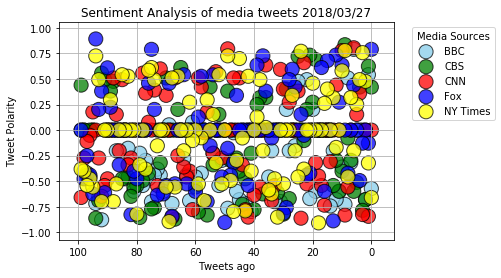

In [49]:


plt.legend(('BBC', 'CBS','CNN', 'Fox','NY Times'),title='Media Sources',bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()
plt.gray()
plt.gca().invert_xaxis()
plt.savefig("newssentiment.png")
plt.show()

## Get the mean of the compound sentiment to plot as a bar graph

In [50]:
sentiments_mean_df = pd.DataFrame(sentiments_df.groupby(["News Handle"]).mean())
sentiments_mean_df

,Tweets Ago,Compound Sentiment,Positive Sentiment,Negative Sentiment,Neutral Sentiment
News Handle,,,,,
@BBCWorld,49.5,-0.219993,0.03087,0.14351,0.82561
@CBSNews,49.5,-0.116549,0.04711,0.10100,0.85188
@CNN,49.5,-0.060657,0.05848,0.09262,0.84889
@FoxNews,49.5,-0.037896,0.07141,0.09072,0.83785
@NYTimes,49.5,-0.049374,0.07762,0.08824,0.83409


## Plot it and save the figure

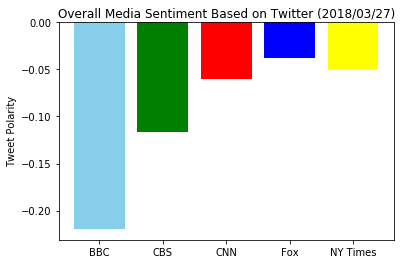

In [51]:
colors=('skyblue','green','red','blue','yellow')
plt.bar(('BBC', 'CBS','CNN', 'Fox','NY Times'),sentiments_mean_df["Compound Sentiment"],color=colors)
plt.ylabel("Tweet Polarity")
plt.title(f"Overall Media Sentiment Based on Twitter ({today})")
plt.savefig("overallnewssentiment.png")
plt.show()

### Bonus - HTML to hide warnings in the Jupyter notebook:

In [52]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')